In [91]:
from sklearn.datasets import load_diabetes
import pandas as pd
load_diabetes = load_diabetes()
load_diabetes.keys()


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [92]:
df = pd.DataFrame(data = load_diabetes.data, columns = load_diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


# 머신러닝 프로세스
1. 데이터 수집
2. 데이터 전처리
3. 데이터 탐색

4. 모델 선택
5. 모델 학습
6. 모델 평가
7. 모델 개선
8. 모델 배포

# 데이터 수집

In [93]:
from sklearn.datasets import load_iris
load_iris = load_iris()
iris_data = load_iris.data
iris_data # X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [94]:
iris_label = load_iris.target #y
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [95]:
load_iris.target_names, load_iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

## 데이터 분할

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=42) # x, y, 8:2

## 모델 생성

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf

DecisionTreeClassifier()

## 모델 학습

In [18]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
pred = dt_clf.predict(X_test)
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## 평가

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred) # 정확도

1.0

# 의사결정 나무 시각화

In [87]:
import graphviz
from sklearn.tree import export_graphviz

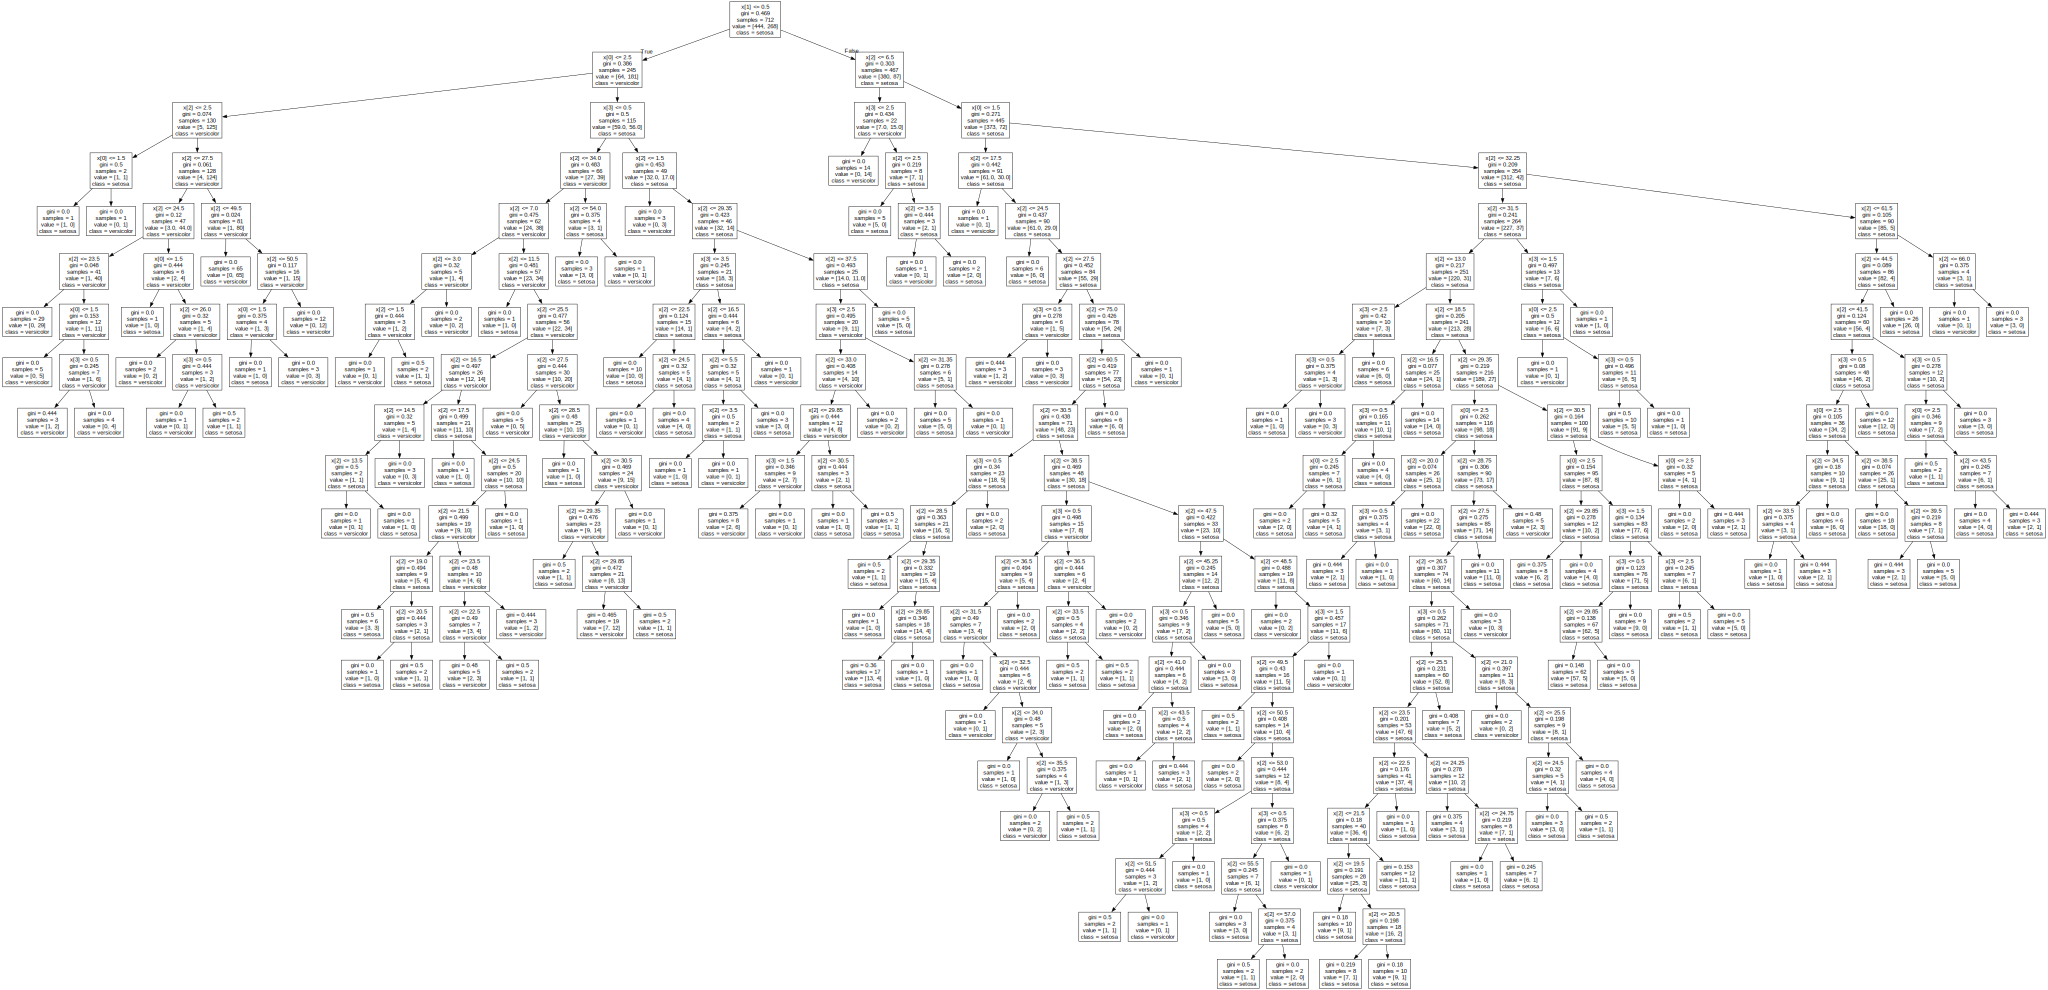

In [96]:
export_graphviz(dt_clf, out_file="tree.dot", 
                class_names=load_iris.target_names,)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 교차검증

In [97]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
iris_clf = DecisionTreeClassifier(random_state=156)
iris_data, iris_label

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [100]:
for train_index, test_index in kfold.split(iris_data):
    X_train, X_test = iris_data[train_index], iris_data[test_index]
    y_train, y_test = iris_label[train_index], iris_label[test_index]
    
    iris_clf.fit(X_train, y_train)
    pred = iris_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000
Accuracy: 0.9667
Accuracy: 0.8667
Accuracy: 0.9333
Accuracy: 0.7333


# stratified split

In [103]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names )
iris_df['label']  = iris.target
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [104]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(iris_df, iris_df['label']):
  y_train = iris_df['label'].iloc[train_index]
  y_test =  iris_df['label'].iloc[test_index]
  print(f'train 분포: {y_train.value_counts()}')
  print(f'test 분포: {y_test.value_counts()}')

train 분포: label
0    40
1    40
2    40
Name: count, dtype: int64
test 분포: label
0    10
1    10
2    10
Name: count, dtype: int64
train 분포: label
0    40
1    40
2    40
Name: count, dtype: int64
test 분포: label
0    10
1    10
2    10
Name: count, dtype: int64
train 분포: label
0    40
1    40
2    40
Name: count, dtype: int64
test 분포: label
0    10
1    10
2    10
Name: count, dtype: int64
train 분포: label
0    40
1    40
2    40
Name: count, dtype: int64
test 분포: label
0    10
1    10
2    10
Name: count, dtype: int64
train 분포: label
0    40
1    40
2    40
Name: count, dtype: int64
test 분포: label
0    10
1    10
2    10
Name: count, dtype: int64


In [106]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  train_data = iris_df.iloc[train_index]
  test_data = iris_df.iloc[test_index]
  X_train = train_data[iris.feature_names]
  X_test = test_data[iris.feature_names]

  y_train = train_data['label']
  y_test =  test_data['label']

  model = DecisionTreeClassifier(random_state=156)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc = accuracy_score(y_test, pred)
  print(f'acc : {acc}')

acc : 0.9666666666666667
acc : 0.9666666666666667
acc : 0.9
acc : 0.9666666666666667
acc : 1.0


# cross_val_score()의 적용

In [130]:
from sklearn.model_selection import cross_val_score, cross_validate

In [113]:
X = iris.data
y = iris.target
model = DecisionTreeClassifier(random_state=156)
cross_val_score(model,X,y, cv = 5, scoring='accuracy')

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [128]:
skf = StratifiedKFold(n_splits=5)
cross_val_score(model,X,y,cv=skf, scoring='accuracy')

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [131]:
results = cross_validate(model, X,y, cv=skf, scoring='accuracy')
results['test_score']

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

# GridSearchCV - 하이퍼파라미터 + 교차검증

In [118]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=121)

In [120]:
from sklearn.model_selection import GridSearchCV
dt_clf2 = DecisionTreeClassifier(random_state=121)
params = {'max_depth': [1,2,3], 'min_samples_split':[2,3]}
grid_dtree = GridSearchCV(dt_clf2, param_grid=params, cv=3, refit=True)
grid_dtree.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=121),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [121]:
pd.DataFrame(grid_dtree.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000996,1.123916e-07,0.000665,0.000470,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5
1,0.000664,4.696848e-04,0.000330,0.000466,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5
2,0.000997,4.899036e-07,0.000000,0.000000,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3
3,0.000996,7.867412e-07,0.000000,0.000000,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3
4,0.000664,4.697407e-04,0.000332,0.000470,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1
5,0.000000,0.000000e+00,0.000332,0.000470,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.0,0.95,0.975000,2.041241e-02,1


In [127]:
b_model = grid_dtree.best_estimator_ # 최적의 모델
pred = b_model.predict(X_test)
accuracy_score(y_test, pred)

0.9666666666666667

In [123]:
grid_dtree.best_params_# 가장 성능이 좋았던 파라미터들

{'max_depth': 3, 'min_samples_split': 2}

# titanic dataset 으로 분류 모델 만들기

In [136]:
import pandas as pd
df = pd.read_csv('./data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
print(df.isnull().sum())
df.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [137]:
X = df[['Pclass', 'SibSp']]
y = df['Survived']

# 훈련, 테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
# 모델생성
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf

# 모델학습
dt_clf.fit(X_train, y_train)

# 모델예측
pred = dt_clf.predict(X_test)
pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0])

In [140]:
# 모델 평가
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred) # 정확도

0.7039106145251397

In [141]:
print(df.isnull().sum())
df.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [142]:
# 성별: male=1, female=0
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [143]:
# Age 평균으로 채우기
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20212\3363958050.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [144]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [145]:
X = df[['Pclass','Sex', 'Age', 'SibSp']]
y = df['Survived']

# 훈련, 테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
# 모델생성
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf

# 모델학습
dt_clf.fit(X_train, y_train)

# 모델예측
pred = dt_clf.predict(X_test)
pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0])

In [147]:
# 모델 평가
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred) # 정확도

0.7653631284916201

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                  y,
                                                  test_size=0.2,
                                                  random_state=121)

In [179]:
from sklearn.model_selection import GridSearchCV
dt_clf2 = DecisionTreeClassifier(random_state=121)
params = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}
grid_dtree = GridSearchCV(dt_clf2, param_grid=params, cv=3, refit=True)
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=121),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [177]:
pd.DataFrame(grid_dtree.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001333,4.668909e-04,0.000993,4.949060e-06,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.781513,0.805907,0.797468,0.794963,0.010115,4
1,0.001329,4.704150e-04,0.000996,5.150430e-07,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.781513,0.805907,0.797468,0.794963,0.010115,4
2,0.001005,5.444906e-06,0.000991,4.583318e-06,1,4,"{'max_depth': 1, 'min_samples_split': 4}",0.781513,0.805907,0.797468,0.794963,0.010115,4
3,0.000991,4.088027e-06,0.001002,4.084936e-06,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.781513,0.772152,0.801688,0.785117,0.012324,7
4,0.001323,4.687534e-04,0.000000,0.000000e+00,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.781513,0.772152,0.801688,0.785117,0.012324,7
5,0.001323,4.735072e-04,0.000670,4.740684e-04,2,4,"{'max_depth': 2, 'min_samples_split': 4}",0.781513,0.772152,0.801688,0.785117,0.012324,7
6,0.000996,1.123916e-07,0.000997,6.961931e-06,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.802521,0.839662,0.810127,0.817437,0.016020,1
7,0.001046,7.210453e-05,0.001000,4.608055e-06,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.802521,0.839662,0.810127,0.817437,0.016020,1
8,0.000996,1.173403e-06,0.000994,3.654023e-06,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.802521,0.839662,0.810127,0.817437,0.016020,1


In [178]:
b_model = grid_dtree.best_estimator_
pred = b_model.predict(X_test)
accuracy_score(y_test, pred)

0.776536312849162

# 피처 스케일링

In [181]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [182]:
iris_df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_scaled.mean(), iris_scaled.var()

(np.float64(-1.4684549872375404e-15), np.float64(1.0))

# LogisticRegression 모델

- 스케일링 안 한 데이터
- 스케일링 한 데이터

In [186]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

In [187]:
no_scaling_model = LogisticRegression(random_state=11)
no_scaling_model.fit(X_train, y_train)
pred_1 = no_scaling_model.predict(X_test)
acc_1 = accuracy_score(y_test, pred_1)
acc_1

0.9333333333333333

In [190]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(X_train)
X_train_scaled = scaler1.transform(X_train)
X_test_scaled = scaler1.transform(X_test)

In [192]:
scaling_model = LogisticRegression(random_state=11)
scaling_model.fit(X_train_scaled, y_train)
pred_2 = scaling_model.predict(X_test_scaled)
acc_2 = accuracy_score(y_test, pred_2)
acc_2, acc_1

(0.9, 0.9333333333333333)